# Loading the libraries

In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from pandas.plotting import scatter_matrix
import random


# Some global configurations

In [104]:
warnings.filterwarnings('ignore')


# SNS Styles

In [105]:
sns.set(rc={'figure.figsize': (16, 7)})

In [106]:
sns.set(palette='pastel')
sns.set_style({'axes.facecolor': '#dcdcdc', 'grid.color': '#f5f5f5'})

# Module 1: Data Acquisition and Preprocessing:

## 1. Data Acquisition:

### Download the provided historical sales data for the electronics section.

Data is already downloaded and provided as electornics.json. Let's load it into dataframe and print first five entries.

In [107]:
sales_data = pd.read_json('electronics.json')
sales_data.head()

,Customer_ID,Age,Gender,Income_Level,Address,Transaction_ID,Purchase_Date,Product_ID,Product_Category,Brand,Purchase_Amount,Average_Spending_Per_Purchase,Purchase_Frequency_Per_Month,Brand_Affinity_Score,Product_Category_Preferences,Month,Year,Season
0,b81ee6c9-2ae4-48a7-b283-220eaa244f43,40,Female,Medium,"43548 Murray Islands Suite 974\nAmyberg, CT 13457",c6a6c712-e36b-406a-bfde-f53bdcf4744f,2022-04-26,d2f767d6-b01a-41a2-87f7-ec1d1186f50e,Clothing,Brand_C,193,59,2,2,Low,01,2010,Winter
1,,25,Male,High,,0b587838-1e4f-4231-b488-42bcd47c052a,2021-08-10,79eadc55-2de1-41cf-b1b6-40118c0bf8ec,Books,Brand_A,318,77,2,1,Low,08,1989,Fall
2,fdf79bcd-5908-4c90-8501-570ffb5b7648,57,Other,Low,"79683 Kevin Hill Apt. 555\nJohnshire, AR 39961",462925b1-a5bf-4996-bda2-59749de64eea,2021-12-09,9ab75a68-4329-4bd9-a259-2233c0f34c93,Electronics,Brand_A,197,100,9,1,Low,,1995,Winter
3,878dccba-893a-48f9-8d34-6ed394fa3c9c,38,Female,Medium,02998 Hall Meadows Suite 809\nNorth Robertvill...,3cfafa02-6b34-4d77-9e05-d223dfab64e8,2022-12-03,d518569b-ff79-494b-b2b6-7e2af39db86a,Clothing,Brand_C,262,97,3,4,Low,09,2012,Fall
4,0af0bd81-73cc-494e-aa5e-75c6d0b6d743,68,Other,Medium,"21411 Timothy Ford Apt. 320\nDavisborough, AR ...",0d8dc27a-0c8f-4a82-b57e-8bf54cee9759,2020-06-08,b6deac9d-2b7e-4a51-8273-a6534910b3bc,Books,Brand_B,429,85,7,2,High,01,2010,Summer


### Ensure the data includes customer demographics, purchase history, product details, spending amounts, and dates of transactions

Let's check in data if data includes the required columns.

In [108]:
sales_data.columns

Index(['Customer_ID', 'Age', 'Gender', 'Income_Level', 'Address',
       'Transaction_ID', 'Purchase_Date', 'Product_ID', 'Product_Category',
       'Brand', 'Purchase_Amount', 'Average_Spending_Per_Purchase',
       'Purchase_Frequency_Per_Month', 'Brand_Affinity_Score',
       'Product_Category_Preferences', 'Month', 'Year', 'Season'],
      dtype='object')

As the columns showing that all required columns presents.

## 2. Data Cleaning:

### Identify and handle missing values using appropriate techniques like mean/median imputation or dropping rows/columns with excessive missingness.

Let's first check the missing values present.

By seeing dataframe, we can see that missing values represented by "". So, we replace it with np.nan for further procession.

In [109]:
sales_data['Age'].value_counts()

Age
          33
38        28
70        24
20        24
79        24
          ..
41         9
65         9
24         9
Hidden     7
55         7
Name: count, Length: 65, dtype: int64

By checking the data, I've found that there are some empty values and also some 'Hidden' values. Let's check there count.

In [110]:
sales_data.replace('', np.nan).isna().sum()

Customer_ID                      32
Age                              33
Gender                           33
Income_Level                     41
Address                          32
Transaction_ID                   39
Purchase_Date                    35
Product_ID                       40
Product_Category                 44
Brand                            46
Purchase_Amount                  33
Average_Spending_Per_Purchase    26
Purchase_Frequency_Per_Month     37
Brand_Affinity_Score             47
Product_Category_Preferences     31
Month                            40
Year                             39
Season                           36
dtype: int64

In [111]:
sales_data.replace('Hidden', np.nan).isna().sum()

Customer_ID                      12
Age                               7
Gender                           15
Income_Level                      9
Address                          15
Transaction_ID                   11
Purchase_Date                    13
Product_ID                        9
Product_Category                 16
Brand                            12
Purchase_Amount                  16
Average_Spending_Per_Purchase    14
Purchase_Frequency_Per_Month     18
Brand_Affinity_Score             14
Product_Category_Preferences     12
Month                            13
Year                             13
Season                           12
dtype: int64

Now let's replace these values with np.nan.

In [112]:
sales_data.replace('', np.nan, inplace=True)
sales_data.replace('Hidden', np.nan, inplace=True)
sales_data.head()

,Customer_ID,Age,Gender,Income_Level,Address,Transaction_ID,Purchase_Date,Product_ID,Product_Category,Brand,Purchase_Amount,Average_Spending_Per_Purchase,Purchase_Frequency_Per_Month,Brand_Affinity_Score,Product_Category_Preferences,Month,Year,Season
0,b81ee6c9-2ae4-48a7-b283-220eaa244f43,40,Female,Medium,"43548 Murray Islands Suite 974\nAmyberg, CT 13457",c6a6c712-e36b-406a-bfde-f53bdcf4744f,2022-04-26,d2f767d6-b01a-41a2-87f7-ec1d1186f50e,Clothing,Brand_C,193,59,2,2,Low,01,2010,Winter
1,NaN,25,Male,High,NaN,0b587838-1e4f-4231-b488-42bcd47c052a,2021-08-10,79eadc55-2de1-41cf-b1b6-40118c0bf8ec,Books,Brand_A,318,77,2,1,Low,08,1989,Fall
2,fdf79bcd-5908-4c90-8501-570ffb5b7648,57,Other,Low,"79683 Kevin Hill Apt. 555\nJohnshire, AR 39961",462925b1-a5bf-4996-bda2-59749de64eea,2021-12-09,9ab75a68-4329-4bd9-a259-2233c0f34c93,Electronics,Brand_A,197,100,9,1,Low,NaN,1995,Winter
3,878dccba-893a-48f9-8d34-6ed394fa3c9c,38,Female,Medium,02998 Hall Meadows Suite 809\nNorth Robertvill...,3cfafa02-6b34-4d77-9e05-d223dfab64e8,2022-12-03,d518569b-ff79-494b-b2b6-7e2af39db86a,Clothing,Brand_C,262,97,3,4,Low,09,2012,Fall
4,0af0bd81-73cc-494e-aa5e-75c6d0b6d743,68,Other,Medium,"21411 Timothy Ford Apt. 320\nDavisborough, AR ...",0d8dc27a-0c8f-4a82-b57e-8bf54cee9759,2020-06-08,b6deac9d-2b7e-4a51-8273-a6534910b3bc,Books,Brand_B,429,85,7,2,High,01,2010,Summer


Now let's count the total missing value in each column.

In [113]:
sales_data.isna().sum()

Customer_ID                      44
Age                              40
Gender                           48
Income_Level                     50
Address                          47
Transaction_ID                   50
Purchase_Date                    48
Product_ID                       49
Product_Category                 60
Brand                            58
Purchase_Amount                  49
Average_Spending_Per_Purchase    40
Purchase_Frequency_Per_Month     55
Brand_Affinity_Score             61
Product_Category_Preferences     43
Month                            53
Year                             52
Season                           48
dtype: int64

Now let's fill these missing values.

In [114]:
sales_data.dropna(subset=['Customer_ID'], inplace=True) # Drop rows with missing values as this is the unique identifier for the data

sales_data['Age'].fillna(sales_data['Age'].median(), inplace=True) # Replace Age missing values with median as age is numerical data

sales_data['Gender'].fillna(sales_data['Gender'].mode()[0], inplace=True) # As Gender is categorical data, replacing its missing values with mode will be the best option
sales_data['Income_Level'].fillna(sales_data['Income_Level'].mode()[0], inplace=True) # As Income Level is categorical, mode will be best for filling values

sales_data.drop("Address", axis=1, inplace=True) # As address is not much important for our analysis, dropping the column will be the best option
sales_data.drop("Transaction_ID", axis=1, inplace=True) # As Transaction ID is not much important for our analysis, dropping the column will be the best option

sales_data['Purchase_Date'].fillna(method='ffill', inplace=True) # Fill Purchase Date with the forward fill

sales_data.dropna(subset=['Product_ID'], inplace=True) # Drop rows with missing values as this is the unique identifier to check the product which sold

sales_data['Product_Category'].fillna(sales_data['Product_Category'].mode()[0], inplace=True)
sales_data['Brand'].fillna(sales_data['Brand'].mode()[0], inplace=True)

sales_data['Purchase_Amount'].fillna(sales_data['Purchase_Amount'].median(), inplace=True)
sales_data['Average_Spending_Per_Purchase'].fillna(sales_data['Average_Spending_Per_Purchase'].median(), inplace=True)
sales_data['Purchase_Frequency_Per_Month'].fillna(sales_data['Purchase_Frequency_Per_Month'].median(), inplace=True)
sales_data['Brand_Affinity_Score'].fillna(sales_data['Brand_Affinity_Score'].median(), inplace=True)

sales_data['Product_Category_Preferences'].fillna(sales_data['Product_Category_Preferences'].mode()[0], inplace=True)
sales_data['Month'].fillna(sales_data['Month'].mode()[0], inplace=True)
sales_data['Year'].fillna(sales_data['Year'].mode()[0], inplace=True)
sales_data['Season'].fillna(sales_data['Season'].mode()[0], inplace=True)

sales_data.reset_index(inplace=True)
sales_data.drop('index', axis=1, inplace=True)
sales_data.head(2)

,Customer_ID,Age,Gender,Income_Level,Purchase_Date,Product_ID,Product_Category,Brand,Purchase_Amount,Average_Spending_Per_Purchase,Purchase_Frequency_Per_Month,Brand_Affinity_Score,Product_Category_Preferences,Month,Year,Season
0,b81ee6c9-2ae4-48a7-b283-220eaa244f43,40,Female,Medium,2022-04-26,d2f767d6-b01a-41a2-87f7-ec1d1186f50e,Clothing,Brand_C,193,59,2,2,Low,01,2010,Winter
1,fdf79bcd-5908-4c90-8501-570ffb5b7648,57,Other,Low,2021-12-09,9ab75a68-4329-4bd9-a259-2233c0f34c93,Electronics,Brand_A,197,100,9,1,Low,04,1995,Winter


In [115]:
sales_data.isna().sum()

Customer_ID                      0
Age                              0
Gender                           0
Income_Level                     0
Purchase_Date                    0
Product_ID                       0
Product_Category                 0
Brand                            0
Purchase_Amount                  0
Average_Spending_Per_Purchase    0
Purchase_Frequency_Per_Month     0
Brand_Affinity_Score             0
Product_Category_Preferences     0
Month                            0
Year                             0
Season                           0
dtype: int64

### Analyze outliers and determine whether to retain or remove them based on their impact on the analysis.

In [116]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 910 entries, 0 to 909
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Customer_ID                    910 non-null    object
 1   Age                            910 non-null    object
 2   Gender                         910 non-null    object
 3   Income_Level                   910 non-null    object
 4   Purchase_Date                  910 non-null    object
 5   Product_ID                     910 non-null    object
 6   Product_Category               910 non-null    object
 7   Brand                          910 non-null    object
 8   Purchase_Amount                910 non-null    object
 9   Average_Spending_Per_Purchase  910 non-null    object
 10  Purchase_Frequency_Per_Month   910 non-null    object
 11  Brand_Affinity_Score           910 non-null    object
 12  Product_Category_Preferences   910 non-null    object
 13  Month

In [117]:
# sales_data['Customer_ID'] = sales_data['Customer_ID'].astype('')
sales_data['Age'] = sales_data['Age'].astype('int')
# sales_data['Gender'] = sales_data['Gender'].astype('')
# sales_data['Income_Level'] = sales_data['Income_Level'].astype('')
# sales_data['Address'] = sales_data['Address'].astype('')
# sales_data['Transaction_ID'] = sales_data['Transaction_ID'].astype('')
sales_data['Purchase_Date'] = sales_data['Purchase_Date'].astype('datetime64[ns]')
# sales_data['Product_ID'] = sales_data['Product_ID'].astype('')
# sales_data['Product_Category'] = sales_data['Product_Category'].astype('')
# sales_data['Brand'] = sales_data['Brand'].astype('')
sales_data['Purchase_Amount'] = sales_data['Purchase_Amount'].astype('int')
sales_data['Average_Spending_Per_Purchase'] = sales_data['Average_Spending_Per_Purchase'].astype('int')
sales_data['Purchase_Frequency_Per_Month'] = sales_data['Purchase_Frequency_Per_Month'].astype('int')
sales_data['Brand_Affinity_Score'] = sales_data['Brand_Affinity_Score'].astype('int')
# sales_data['Product_Category_Preferences'] = sales_data['Product_Category_Preferences'].astype('')
sales_data['Month'] = sales_data['Month'].astype('int')
sales_data['Year'] = sales_data['Year'].astype('int')
# sales_data['Season'] = sales_data['Season'].astype('')

In [118]:
description = sales_data.describe()
IQR = description.loc['75%'] - description.loc['25%']
integer_columns = sales_data.select_dtypes(include='int').columns
for column in integer_columns:
    lower_bound = description.loc['25%', column] - 1.5 * IQR[column]
    upper_bound = description.loc['75%', column] + 1.5 * IQR[column]
    filtered_values = sales_data[~((sales_data[column] >= lower_bound) & (sales_data[column] <= upper_bound))][column]
    print("Values between {} and {}: {}".format(lower_bound, upper_bound, filtered_values.tolist()))

Values between -11.5 and 112.5: []
Values between -206.5 and 709.5: []
Values between -37.0 and 139.0: []
Values between -4.5 and 15.5: []
Values between -4.5 and 15.5: []
Values between -3.5 and 16.5: []
Values between 1947.5 and 2047.5: []


We can see that no outlier present here.

###  Address inconsistencies in data format and encoding.

Now check the inconsistencies in the data format and encoding.

In [119]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 910 entries, 0 to 909
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Customer_ID                    910 non-null    object        
 1   Age                            910 non-null    int32         
 2   Gender                         910 non-null    object        
 3   Income_Level                   910 non-null    object        
 4   Purchase_Date                  910 non-null    datetime64[ns]
 5   Product_ID                     910 non-null    object        
 6   Product_Category               910 non-null    object        
 7   Brand                          910 non-null    object        
 8   Purchase_Amount                910 non-null    int32         
 9   Average_Spending_Per_Purchase  910 non-null    int32         
 10  Purchase_Frequency_Per_Month   910 non-null    int32         
 11  Brand_Affinity_Scor

As all is in objects, let's convert them to their respective format for proper precessing.

In [120]:
# sales_data['Customer_ID'] = sales_data['Customer_ID'].astype('')
sales_data['Age'] = sales_data['Age'].astype('int')
# sales_data['Gender'] = sales_data['Gender'].astype('')
# sales_data['Income_Level'] = sales_data['Income_Level'].astype('')
# sales_data['Address'] = sales_data['Address'].astype('')
# sales_data['Transaction_ID'] = sales_data['Transaction_ID'].astype('')
sales_data['Purchase_Date'] = sales_data['Purchase_Date'].astype('datetime64[ns]')
# sales_data['Product_ID'] = sales_data['Product_ID'].astype('')
# sales_data['Product_Category'] = sales_data['Product_Category'].astype('')
# sales_data['Brand'] = sales_data['Brand'].astype('')
sales_data['Purchase_Amount'] = sales_data['Purchase_Amount'].astype('int')
sales_data['Average_Spending_Per_Purchase'] = sales_data['Average_Spending_Per_Purchase'].astype('int')
sales_data['Purchase_Frequency_Per_Month'] = sales_data['Purchase_Frequency_Per_Month'].astype('int')
sales_data['Brand_Affinity_Score'] = sales_data['Brand_Affinity_Score'].astype('int')
# sales_data['Product_Category_Preferences'] = sales_data['Product_Category_Preferences'].astype('')
sales_data['Month'] = sales_data['Month'].astype('int')
sales_data['Year'] = sales_data['Year'].astype('int')
# sales_data['Season'] = sales_data['Season'].astype('')

## 3. Data Transformation:

### Create new features that provide deeper insights into customer behavior, such as:
* Average spending per purchase
* Purchase frequency per month
* Brand affinity score (based on product brand preferences)
* Product category preferences (e.g., TVs, smartphones, laptops)

In [121]:
sales_data.columns

Index(['Customer_ID', 'Age', 'Gender', 'Income_Level', 'Purchase_Date',
       'Product_ID', 'Product_Category', 'Brand', 'Purchase_Amount',
       'Average_Spending_Per_Purchase', 'Purchase_Frequency_Per_Month',
       'Brand_Affinity_Score', 'Product_Category_Preferences', 'Month', 'Year',
       'Season'],
      dtype='object')

We can check that all of these are already present.

### Standardize or normalize numeric features to ensure they contribute equally to the clustering algorithms.

Now let's standerdize the numeric features.

In [122]:
integer_columns = sales_data.select_dtypes(include='int')
for column in integer_columns:
    sales_data[column+"_n"] = (sales_data[column] - sales_data[column].mean()) / sales_data[column].std()

In [123]:
sales_data.head(2)

,Customer_ID,Age,Gender,Income_Level,Purchase_Date,Product_ID,Product_Category,Brand,Purchase_Amount,Average_Spending_Per_Purchase,...,Month,Year,Season,Age_n,Purchase_Amount_n,Average_Spending_Per_Purchase_n,Purchase_Frequency_Per_Month_n,Brand_Affinity_Score_n,Month_n,Year_n
0,b81ee6c9-2ae4-48a7-b283-220eaa244f43,40,Female,Medium,2022-04-26,d2f767d6-b01a-41a2-87f7-ec1d1186f50e,Clothing,Brand_C,193,59,...,1,2010,Winter,-0.549891,-0.407459,0.278761,-1.244885,-1.211692,-1.584554,0.864915
1,fdf79bcd-5908-4c90-8501-570ffb5b7648,57,Other,Low,2021-12-09,9ab75a68-4329-4bd9-a259-2233c0f34c93,Electronics,Brand_A,197,100,...,4,1995,Winter,0.399318,-0.378231,1.818217,1.303289,-1.573925,-0.703170,-0.139688


# Module 2: Exploratory Data Analysis(EDA):

## 1. Univariate Analysis:

### Analyze the distribution of key features like customer age, purchase amount, and purchase frequency using histograms, boxplots, and descriptive statistics.

Let's analyze the key features using histogram, boxplots and descriptive statistice.

In [124]:
# Get all the columns with their datatype
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 910 entries, 0 to 909
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Customer_ID                      910 non-null    object        
 1   Age                              910 non-null    int32         
 2   Gender                           910 non-null    object        
 3   Income_Level                     910 non-null    object        
 4   Purchase_Date                    910 non-null    datetime64[ns]
 5   Product_ID                       910 non-null    object        
 6   Product_Category                 910 non-null    object        
 7   Brand                            910 non-null    object        
 8   Purchase_Amount                  910 non-null    int32         
 9   Average_Spending_Per_Purchase    910 non-null    int32         
 10  Purchase_Frequency_Per_Month     910 non-null    int32        

In [125]:
# Get the data that isn't normalized in another dataframe name eda_df for exploratory data analysis
eda_columns = sales_data.select_dtypes(include=['int', 'object', 'datetime64[ns]'])
eda_df = sales_data[eda_columns.columns]

In [126]:
# Descriptive statistics for numerical and object type columns seperately
display(eda_df.describe())
display(eda_df.describe(include='object'))

,Age,Purchase_Date,Purchase_Amount,Average_Spending_Per_Purchase,Purchase_Frequency_Per_Month,Brand_Affinity_Score,Month,Year
count,910.000000,910,910.000000,910.000000,910.000000,910.000000,910.000000,910.000000
mean,49.848352,2021-12-25 06:21:21.758241792,248.761538,51.575824,5.419780,5.345055,6.393407,1997.085714
min,18.000000,2020-01-02 00:00:00,10.000000,5.000000,1.000000,1.000000,1.000000,1970.000000
25%,35.000000,2020-12-30 00:00:00,137.000000,29.000000,3.000000,3.000000,4.000000,1985.000000
50%,50.000000,2022-01-10 12:00:00,241.000000,50.000000,5.000000,5.000000,6.000000,1996.000000
75%,66.000000,2022-12-15 06:00:00,366.000000,73.000000,8.000000,8.000000,9.000000,2010.000000
max,80.000000,2023-12-01 00:00:00,500.000000,100.000000,10.000000,10.000000,12.000000,2023.000000
std,17.909658,NaN,136.851799,26.632781,2.747064,2.760648,3.403738,14.931281


,Customer_ID,Gender,Income_Level,Product_ID,Product_Category,Brand,Product_Category_Preferences,Season
count,910,910,910,910,910,910,910,910
unique,910,3,3,910,3,3,3,4
top,b81ee6c9-2ae4-48a7-b283-220eaa244f43,Other,Medium,d2f767d6-b01a-41a2-87f7-ec1d1186f50e,Electronics,Brand_C,Low,Fall
freq,1,349,354,1,384,362,337,269


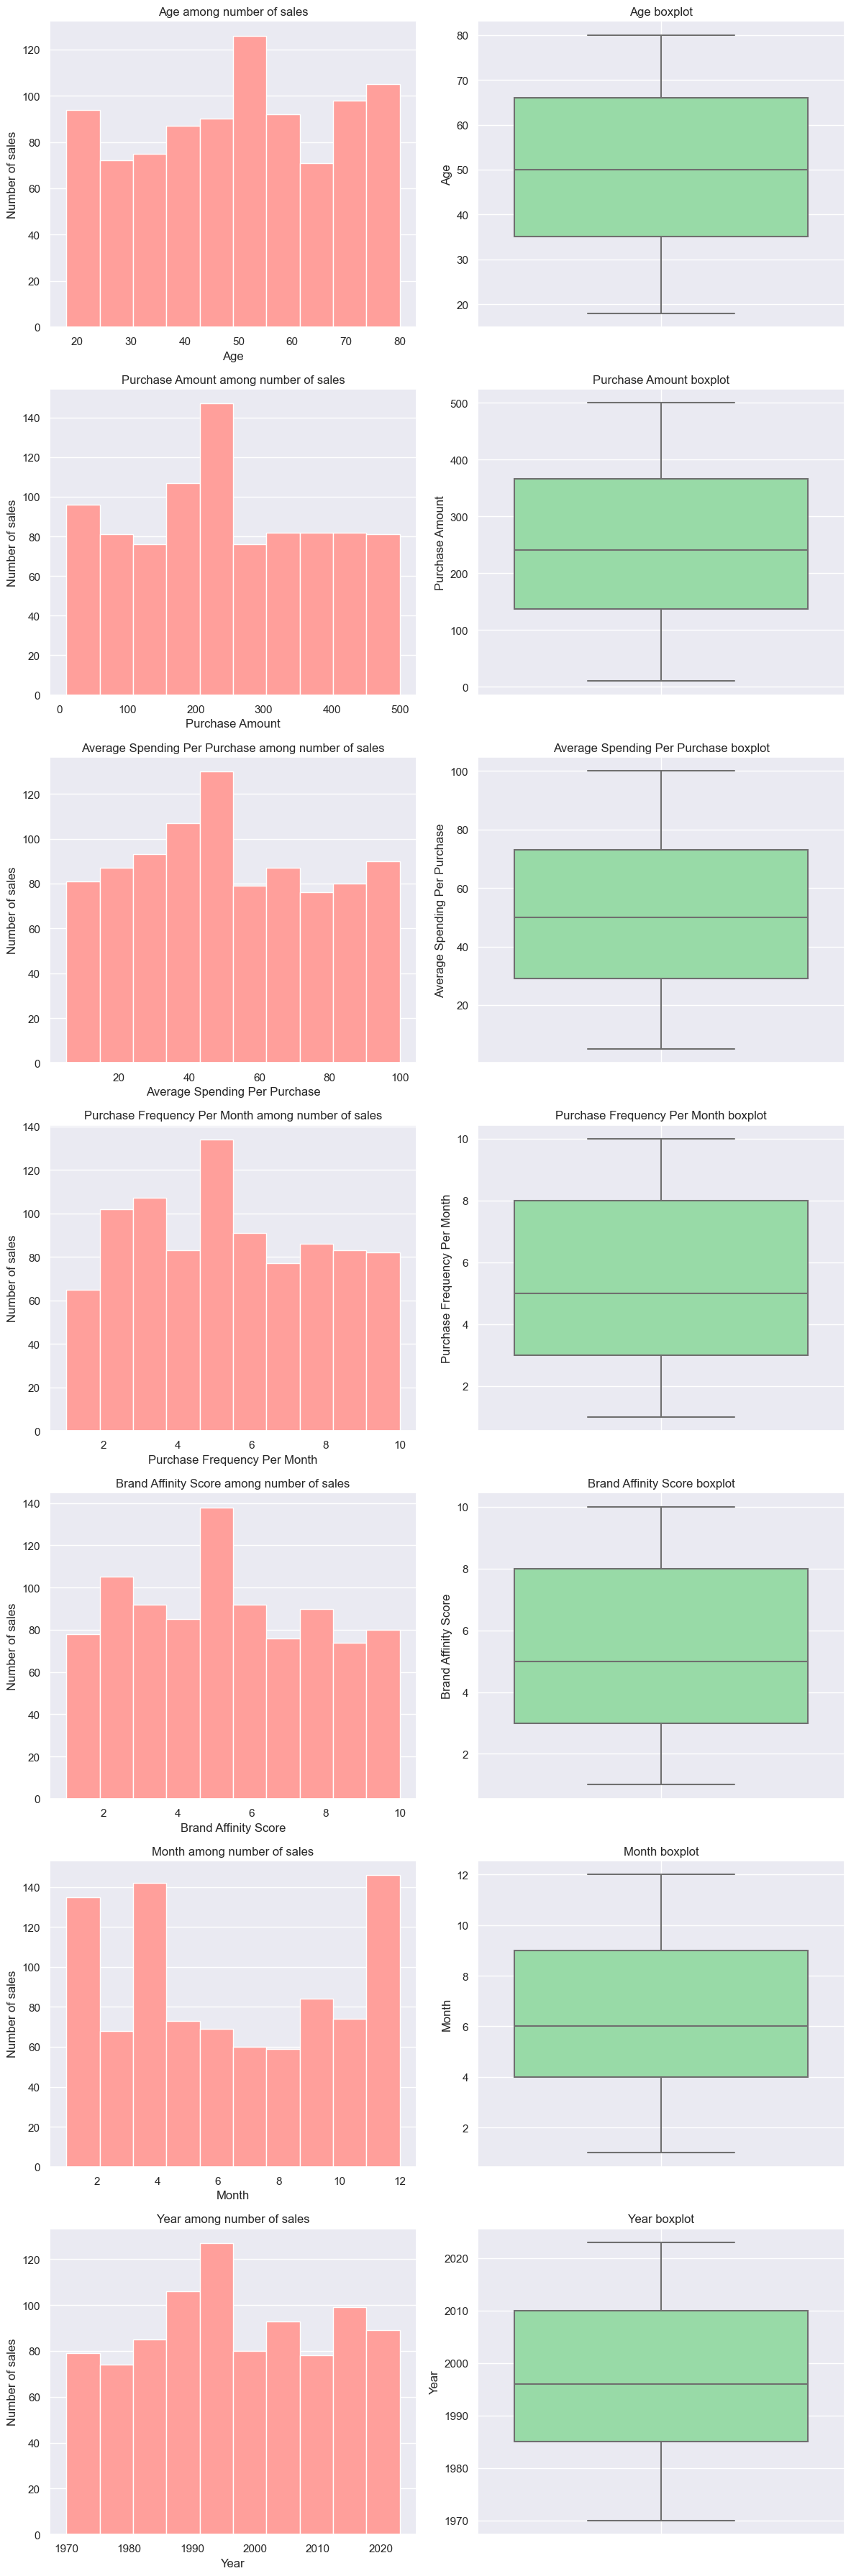

In [127]:
integer_columns = eda_df.select_dtypes(include='int').columns
splits = 2
integer_columns_length = len(integer_columns)
fig = plt.figure(figsize=(12, 36))
sns.set(palette='tab10', style='darkgrid')
for index, i in enumerate(range(0, integer_columns_length * 2, 2)):
    title = " ".join(integer_columns[index].split("_"))
    temp_axes = fig.add_subplot(math.ceil(integer_columns_length*2/splits), splits, i+1)
    temp_axes.hist(eda_df[integer_columns[index]], color='r')
    temp_axes.grid(axis='x')
    temp_axes.set_title(title + " among number of sales")
    temp_axes.set_ylabel('Number of sales')
    temp_axes.set_xlabel(title)

    temp_axes1 = fig.add_subplot(math.ceil(integer_columns_length*2/splits), splits, i+2)
    temp_axes1 = sns.boxplot(y=eda_df[integer_columns[index]], color='g')
    temp_axes1.grid(axis='x')
    temp_axes1.set_title(title + " boxplot")
    temp_axes1.set_ylabel(title)
    
plt.tight_layout()
plt.show()

KeyError: 0

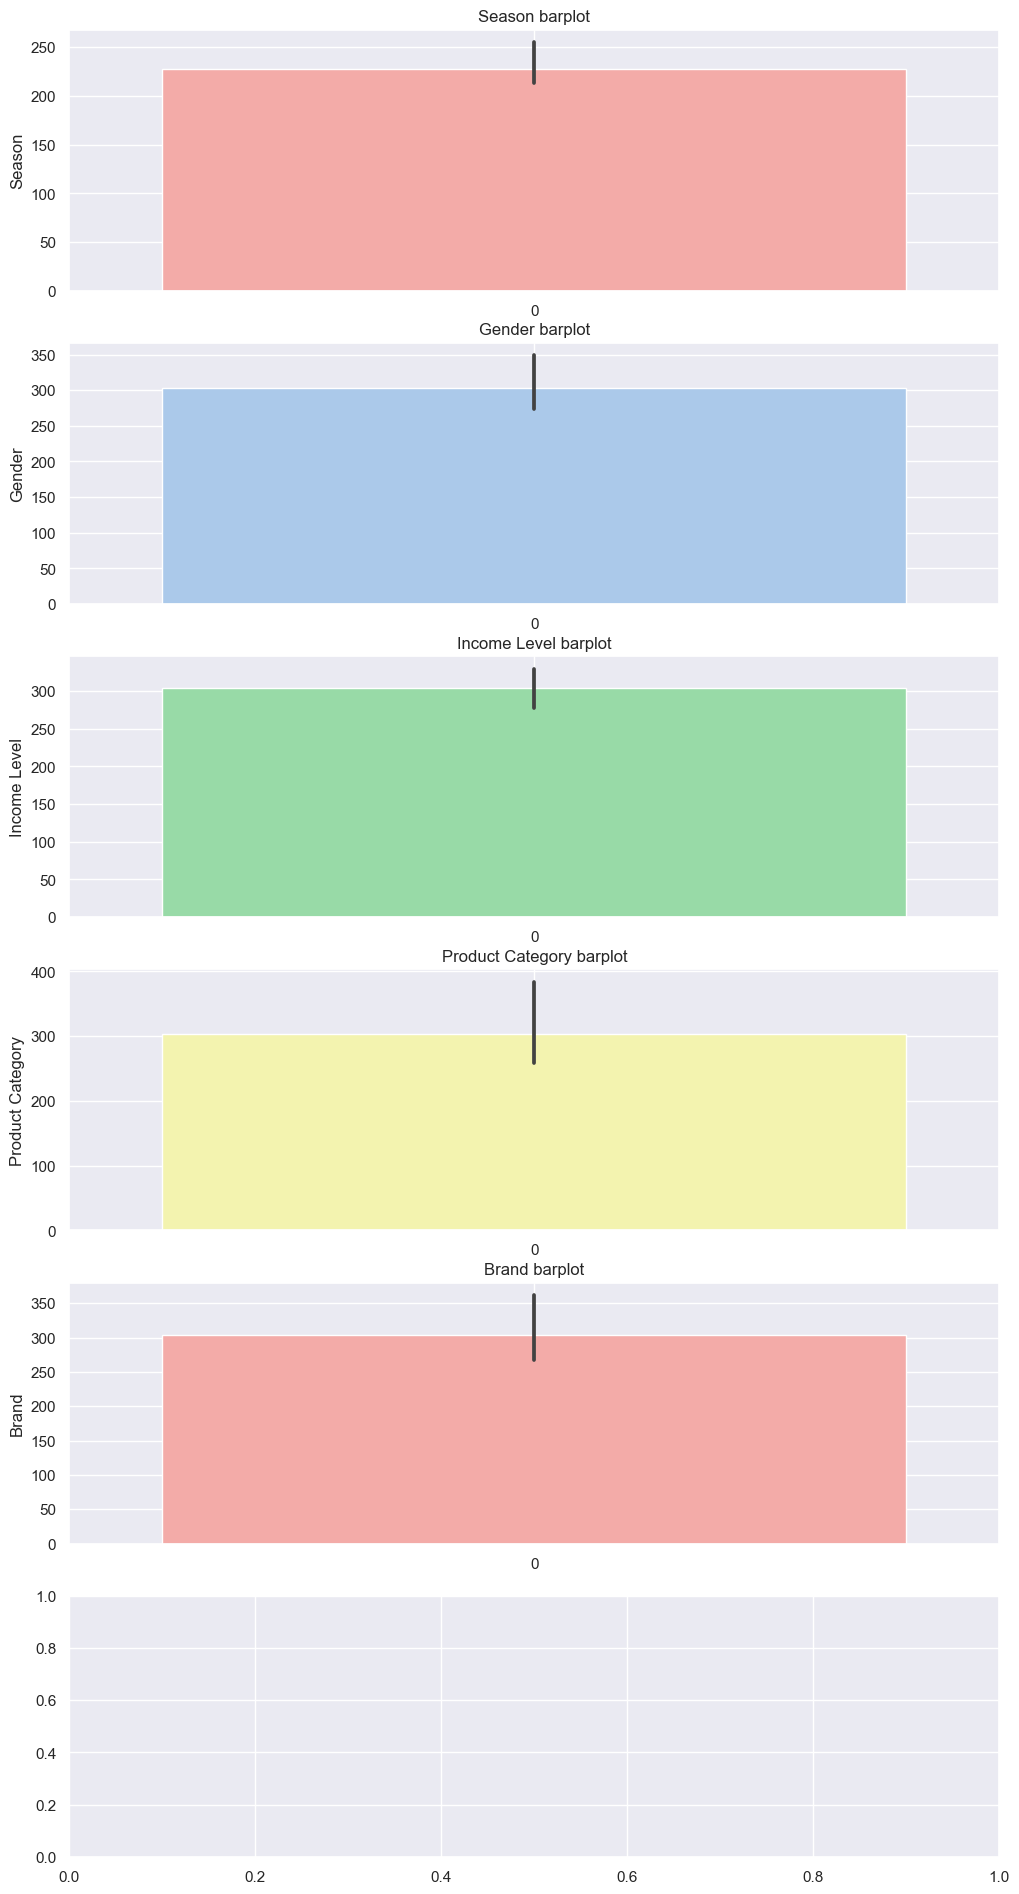

In [128]:
integer_columns = [
    'Season','Gender', 'Income_Level', 'Product_Category', 'Brand', 'Purchase_Frequency_Per_Month', 
    'Brand_Affinity_Score', 'Product_Category_Preferences', 'Month', 'Age'
                    ]
splits = 1
integer_columns_length = len(integer_columns)
fig = plt.figure(figsize=(12, 40))
for i in range(integer_columns_length):
    title = " ".join(integer_columns[i].split("_"))
    temp_axes = fig.add_subplot(math.ceil(integer_columns_length/splits), splits, i+1)
    temp_axes = sns.barplot(eda_df[integer_columns[i]].value_counts(), color=['r', 'b', 'g', 'y'][i%4])
    temp_axes.grid(axis='x')
    temp_axes.set_title(title + " barplot")
    temp_axes.set_ylabel(title)
    # break
plt.tight_layout()
plt.show()

### Identify potential skewness or outliers in the data.

On seeing the data, we can see that no outlier is present in data and also data is not too much skewed.

## 2. Bivariate Analysis:


### Utilize scatterplots and heatmaps to explore relationships between different features, such as purchase amount vs. income level, brand affinity vs. product category, and purchase frequency vs. age.

In [ ]:
integer_columns = eda_df.select_dtypes(include='int').columns
splits = 1
temp = 0
integer_columns_length = len(integer_columns)
fig = plt.figure(figsize=(12, 200))
for i in range(integer_columns_length):
    for j in range(integer_columns_length):
        if i!= j:
            temp = temp + 1
            title_j = " ".join(integer_columns[j].split("_"))
            title_i = " ".join(integer_columns[i].split("_"))
            temp_axes = fig.add_subplot(math.ceil((integer_columns_length*integer_columns_length - integer_columns_length)/splits), splits, temp)
            temp_axes = sns.regplot(x=eda_df[integer_columns[i]], y=eda_df[integer_columns[j]], 
                                    scatter_kws={"color": "g"}, line_kws={"color": "r"})
            temp_axes.grid(axis='x')
            temp_axes.set_title(title_i + " among " + title_j)
            temp_axes.set_ylabel(title_j)
            temp_axes.set_xlabel(title_i)
            # break
    # break
    
plt.tight_layout()
plt.show()

In [ ]:
correlation = eda_df.select_dtypes(include=['int', 'datetime64[ns]']).corr()
fig, ax = plt.subplots()
ax = sns.heatmap(correlation, cmap="Blues")
ax.set_xticks(np.arange(correlation.shape[1])+0.5)
ax.set_yticks(np.arange(correlation.shape[0])+0.5)
ax.set_xticklabels(correlation.columns)
ax.set_yticklabels(correlation.index)
ax.tick_params(axis='x', rotation = 90)
# fig.colorbar(im)

### Investigate the presence of correlations and identify any impactful relationships.

We can see that very low correlation is present between fields and also the linear line shows very less dependency of features.

## Temporal Analysis:

In [ ]:
eda_df.head()

In [ ]:
integer_columns = ['Purchase_Amount', 'Average_Spending_Per_Purchase', 'Purchase_Frequency_Per_Month']
splits = 1
integer_columns_length = len(integer_columns)
fig = plt.figure(figsize=(14, 10))
group_by_data = eda_df.groupby(eda_df['Purchase_Date'])
for i in range(integer_columns_length):
        title_i = " ".join(integer_columns[i].split("_"))
        temp_axes = fig.add_subplot(math.ceil(integer_columns_length/splits), splits, i + 1)
        data = group_by_data[integer_columns[i]].sum()
        # cum_data = group_by_data[integer_columns[i]].count()
        # for temp in data:
        # display(data)
        # display(data.index)
        # data.unstack()
        # data.plot(kind="line")
        # temp_axes = eda_df['Purchase_Date'].dt.year.value_counts().plot(kind="line")
        temp_axes.plot(data.index, data.values)
        print(data)
        # temp_axes.plot(cum_data.index, cum_data.values)
        # temp_axes.grid(axis='x')
        temp_axes.set_title(title_i + " trend over time")
        # temp_axes.set_xlabel("Purchase Date")
        # temp_axes.set_ylabel(title_i)
        # if i >= 0:
        # break
    
plt.tight_layout()
plt.show()

## K Means

### Age_n VS Average_Spending_Per_Purchase_n

In [ ]:
data = sales_data[['Age_n', 'Average_Spending_Per_Purchase_n']]

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()

silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(data_scaled)
    silhouette_avg = silhouette_score(data_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Analysis for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.show()

optimal_k = 4 

kmeans = KMeans(n_clusters=optimal_k, random_state=42)
sales_data['Cluster'] = kmeans.fit_predict(data_scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age_n', y='Average_Spending_Per_Purchase_n', hue='Cluster', data=sales_data, palette='viridis', legend='full')

centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', marker='o', label='Centroids')

plt.title('K-means Clustering with Centroids')
plt.xlabel('Age')
plt.ylabel('Average Spending (Normalized)')

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()



### Age_n VS Purchase_Frequency_Per_Month_n

In [ ]:
data = sales_data[['Age_n', 'Purchase_Frequency_Per_Month_n']]

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()

silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(data_scaled)
    silhouette_avg = silhouette_score(data_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Analysis for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.show()

optimal_k = 4  

kmeans = KMeans(n_clusters=optimal_k, random_state=42)
sales_data['Cluster'] = kmeans.fit_predict(data_scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age_n', y='Purchase_Frequency_Per_Month_n', hue='Cluster', data=sales_data, palette='viridis', legend='full')

centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', marker='o', label='Centroids')

plt.title('K-means Clustering with Centroids')
plt.xlabel('Age')
plt.ylabel('Purchase_Frequency_Per_Month (Normalized)')

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()



### Age_n VS Purchase_Amount_n

In [ ]:
data = sales_data[['Age_n', 'Purchase_Amount_n']]

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()

silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(data_scaled)
    silhouette_avg = silhouette_score(data_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Analysis for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.show()

optimal_k = 5 

kmeans = KMeans(n_clusters=optimal_k, random_state=42)
sales_data['Cluster'] = kmeans.fit_predict(data_scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age_n', y='Purchase_Amount_n', hue='Cluster', data=sales_data, palette='viridis', legend='full')

centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', marker='o', label='Centroids')

plt.title('K-means Clustering with Centroids')
plt.xlabel('Age')
plt.ylabel('Purchase_Frequency_Per_Month (Normalized)')

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()



### Purchase_Amount_n VS Purchase_Frequency_Per_Month_n

In [ ]:
data = sales_data[['Purchase_Amount_n', 'Purchase_Frequency_Per_Month_n']]

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()

silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(data_scaled)
    silhouette_avg = silhouette_score(data_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Analysis for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.show()

optimal_k = 4  

kmeans = KMeans(n_clusters=optimal_k, random_state=42)
sales_data['Cluster'] = kmeans.fit_predict(data_scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Purchase_Amount_n', y='Purchase_Frequency_Per_Month_n', hue='Cluster', data=sales_data, palette='viridis', legend='full')

centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', marker='o', label='Centroids')

plt.title('K-means Clustering with Centroids')
plt.xlabel('Age')
plt.ylabel('Purchase_Frequency_Per_Month (Normalized)')

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()



## DBSCAN Clustering

### Purchase Amount VS Age

#### Define eps and MinPts parameters:

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np

data = sales_data[['Age_n', 'Purchase_Amount_n']]

eps_values = [0.1, 0.5, 1.0, 1.5]
min_samples_values = [3, 5, 7]

best_silhouette_score = -1
best_eps = None
best_min_samples = None

print("All Combinations:")
for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(data)

        unique_labels = np.unique(labels)

        if len(unique_labels) == 1:
            continue

        silhouette_avg = silhouette_score(data, labels)
        print(f"For eps={eps}, min_samples={min_samples}, Silhouette Score: {silhouette_avg}")

        if silhouette_avg > best_silhouette_score:
            best_silhouette_score = silhouette_avg
            best_eps = eps
            best_min_samples = min_samples

print("\nBest Parameters:")
print(f"eps={best_eps}, min_samples={best_min_samples}, Silhouette Score: {best_silhouette_score}")


#### Clustering

In [ ]:
data = sales_data[['Age_n', 'Purchase_Amount_n']]

dbscan = DBSCAN(eps=0.5, min_samples=5) 
sales_data['Cluster'] = dbscan.fit_predict(data)

plt.figure(figsize=(10, 6))

core_points_mask = dbscan.core_sample_indices_
sns.scatterplot(x='Age_n', y='Purchase_Amount_n', hue='Cluster', data=sales_data,
                palette={-1: 'gray', 0: 'red', 1: 'blue', 2: 'green', 3: 'purple'},  
                legend='full', style=sales_data['Cluster'], markers=["o"], s=50)

border_points_mask = ~core_points_mask & (sales_data['Cluster'] != -1)
sns.scatterplot(x='Age_n', y='Purchase_Amount_n', data=sales_data[border_points_mask],
                color='blue', marker='o', label='Border point', s=50)

noise_points_mask = (sales_data['Cluster'] == -1)
sns.scatterplot(x='Age_n', y='Purchase_Amount_n', data=sales_data[noise_points_mask],
                color='gray', marker='X', label='Noise', s=50)

plt.title('DBSCAN Clustering')
plt.xlabel('Age_n')
plt.ylabel('Purchase_Amount_n (Normalized)')

handles, labels = plt.gca().get_legend_handles_labels()
labels = [label.replace('0', 'Core Point') for label in labels]  
plt.legend(handles, labels, loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

### Purchase_Amount_n VS Purchase_Frequency_Per_Month_n

#### Define eps and MinPts parameters:

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np

data = sales_data[['Purchase_Amount_n', 'Purchase_Frequency_Per_Month_n']]

eps_values = [0.1, 0.5, 1.0, 1.5]
min_samples_values = [3, 5, 7]

best_silhouette_score = -1
best_eps = None
best_min_samples = None

print("All Combinations:")
for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(data)

        unique_labels = np.unique(labels)

        if len(unique_labels) == 1:
            continue

        silhouette_avg = silhouette_score(data, labels)
        print(f"For eps={eps}, min_samples={min_samples}, Silhouette Score: {silhouette_avg}")

        if silhouette_avg > best_silhouette_score:
            best_silhouette_score = silhouette_avg
            best_eps = eps
            best_min_samples = min_samples

print("\nBest Parameters:")
print(f"eps={best_eps}, min_samples={best_min_samples}, Silhouette Score: {best_silhouette_score}")


### Clustering

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

data = sales_data[['Purchase_Amount_n', 'Purchase_Frequency_Per_Month_n']]


dbscan = DBSCAN(eps=0.5, min_samples=5)  
sales_data['Cluster'] = dbscan.fit_predict(data)

plt.figure(figsize=(10, 6))

core_points_mask = dbscan.core_sample_indices_
sns.scatterplot(x='Purchase_Amount_n', y='Purchase_Frequency_Per_Month_n', hue='Cluster', data=sales_data,
                palette={-1: 'gray', 0: 'red', 1: 'blue', 2: 'green', 3: 'purple'},  
                legend='full', style=sales_data['Cluster'], markers=["o"], s=50)

border_points_mask = ~core_points_mask & (sales_data['Cluster'] != -1)
sns.scatterplot(x='Purchase_Amount_n', y='Purchase_Frequency_Per_Month_n', data=sales_data[border_points_mask],
                color='blue', marker='o', label='Border point', s=50)

noise_points_mask = (sales_data['Cluster'] == -1)
sns.scatterplot(x='Purchase_Amount_n', y='Purchase_Frequency_Per_Month_n', data=sales_data[noise_points_mask],
                color='gray', marker='X', label='Noise', s=50)

plt.title('DBSCAN Clustering')
plt.xlabel('Purchase_Amount')
plt.ylabel('Purchase_Frequency_Per_Month (Normalized)')

handles, labels = plt.gca().get_legend_handles_labels()
labels = [label.replace('0', 'Core Point') for label in labels]  
plt.legend(handles, labels, loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


### Age_n VS Average_Spending_Per_Purchase_n

#### Define eps and MinPts parameters:

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np

data = sales_data[['Age_n', 'Average_Spending_Per_Purchase_n']]

eps_values = [0.1, 0.5, 1.0, 1.5]
min_samples_values = [3, 5, 7]

best_silhouette_score = -1
best_eps = None
best_min_samples = None

print("All Combinations:")
for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(data)

        unique_labels = np.unique(labels)

        if len(unique_labels) == 1:
            continue

        silhouette_avg = silhouette_score(data, labels)
        print(f"For eps={eps}, min_samples={min_samples}, Silhouette Score: {silhouette_avg}")

        if silhouette_avg > best_silhouette_score:
            best_silhouette_score = silhouette_avg
            best_eps = eps
            best_min_samples = min_samples

print("\nBest Parameters:")
print(f"eps={best_eps}, min_samples={best_min_samples}, Silhouette Score: {best_silhouette_score}")


### Clustering

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

data = sales_data[['Age_n', 'Average_Spending_Per_Purchase_n']]

dbscan = DBSCAN(eps=0.5, min_samples=5)  
sales_data['Cluster'] = dbscan.fit_predict(data)

plt.figure(figsize=(10, 6))

core_points_mask = dbscan.core_sample_indices_
sns.scatterplot(x='Age_n', y='Average_Spending_Per_Purchase_n', hue='Cluster', data=sales_data,
                palette={-1: 'gray', 0: 'red', 1: 'blue', 2: 'green', 3: 'purple'},  
                legend='full', style=sales_data['Cluster'], markers=["o"], s=50)

border_points_mask = ~core_points_mask & (sales_data['Cluster'] != -1)
sns.scatterplot(x='Age_n', y='Average_Spending_Per_Purchase_n', data=sales_data[border_points_mask],
                color='blue', marker='o', label='Border point', s=50)

noise_points_mask = (sales_data['Cluster'] == -1)
sns.scatterplot(x='Age_n', y='Average_Spending_Per_Purchase_n', data=sales_data[noise_points_mask],
                color='gray', marker='X', label='Noise', s=50)

plt.title('DBSCAN Clustering')
plt.xlabel('Age')
plt.ylabel('Average Spending (Normalized)')

handles, labels = plt.gca().get_legend_handles_labels()
labels = [label.replace('0', 'Core Point') for label in labels] 
plt.legend(handles, labels, loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


### Evalute DBSCAN VS K Means for Age_n for Average_Spending_Per_Purchase_n

#### DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

data = sales_data[['Age_n', 'Average_Spending_Per_Purchase_n']]

dbscan = DBSCAN(eps=0.5, min_samples=5)
sales_data['DBSCAN_Cluster'] = dbscan.fit_predict(data)

plt.figure(figsize=(10, 6))

core_points_mask = dbscan.core_sample_indices_
sns.scatterplot(x='Age_n', y='Average_Spending_Per_Purchase_n', hue='DBSCAN_Cluster', data=sales_data,
                palette={-1: 'gray', 0: 'red', 1: 'blue', 2: 'green', 3: 'purple'},
                legend='full', style=sales_data['DBSCAN_Cluster'], markers=["o"], s=50)

border_points_mask = ~core_points_mask & (sales_data['DBSCAN_Cluster'] != -1)
sns.scatterplot(x='Age_n', y='Average_Spending_Per_Purchase_n', data=sales_data[border_points_mask],
                color='blue', marker='o', label='Border point', s=50)

noise_points_mask = (sales_data['DBSCAN_Cluster'] == -1)
sns.scatterplot(x='Age_n', y='Average_Spending_Per_Purchase_n', data=sales_data[noise_points_mask],
                color='gray', marker='X', label='Noise', s=50)

plt.title('DBSCAN Clustering')
plt.xlabel('Age')
plt.ylabel('Average Spending (Normalized)')

handles, labels = plt.gca().get_legend_handles_labels()
labels = [label.replace('0', 'Core Point') for label in labels]  
plt.legend(handles, labels, loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


#### KMeans

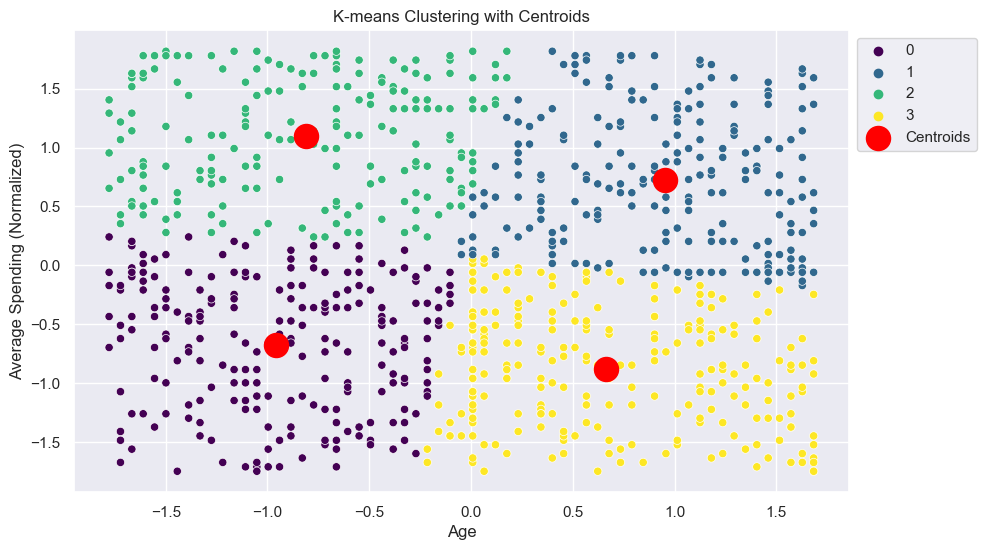

In [129]:
from sklearn.cluster import KMeans

data = sales_data[['Age_n', 'Average_Spending_Per_Purchase_n']]

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

optimal_k = 4  

kmeans = KMeans(n_clusters=optimal_k, random_state=42)
sales_data['KMeans_Cluster'] = kmeans.fit_predict(data_scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age_n', y='Average_Spending_Per_Purchase_n', hue='KMeans_Cluster', data=sales_data, palette='viridis', legend='full')

centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', marker='o', label='Centroids')

plt.title('K-means Clustering with Centroids')
plt.xlabel('Age')
plt.ylabel('Average Spending (Normalized)')

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


### KMeans++

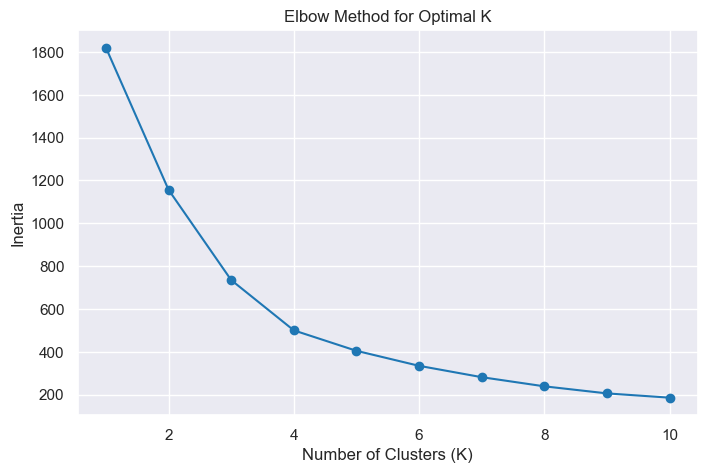

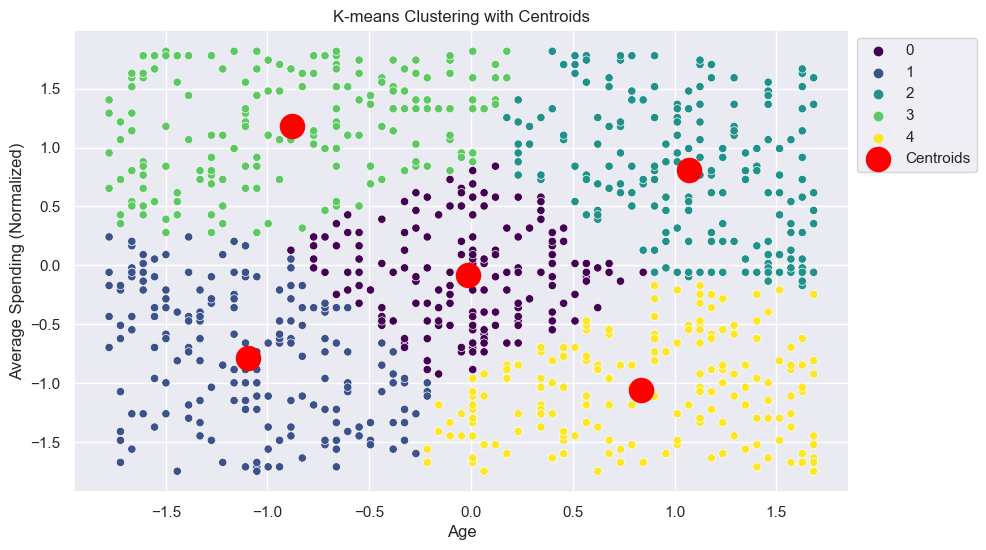

In [150]:
data = sales_data[['Age_n', 'Average_Spending_Per_Purchase_n']]

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)


inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, init='k-means++')  # Use K-means++ initialization
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()

optimal_k = 5 


kmeans_initial = KMeans(n_clusters=1, init='k-means++', random_state=42)
kmeans_initial.fit(data_scaled)
initial_centroid = kmeans_initial.cluster_centers_

kmeans = KMeans(n_clusters=optimal_k - 1, init='k-means++', random_state=42)
kmeans.fit(data_scaled)
remaining_centroids = kmeans.cluster_centers_

initial_centroids = np.concatenate((initial_centroid, remaining_centroids), axis=0)


kmeans_final = KMeans(n_clusters=optimal_k, init=initial_centroids, n_init=1, random_state=42)
sales_data['KMeans_Cluster'] = kmeans_final.fit_predict(data_scaled)


plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age_n', y='Average_Spending_Per_Purchase_n', hue='KMeans_Cluster', data=sales_data, palette='viridis', legend='full')

centroids = kmeans_final.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', marker='o', label='Centroids')

plt.title('K-means Clustering with Centroids')
plt.xlabel('Age')
plt.ylabel('Average Spending (Normalized)')

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


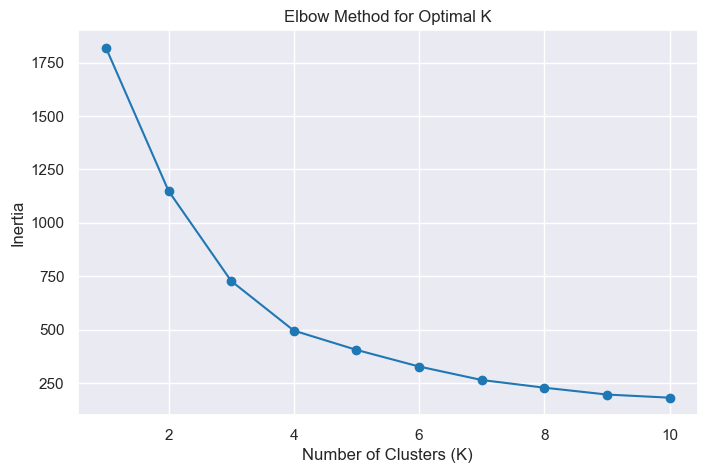

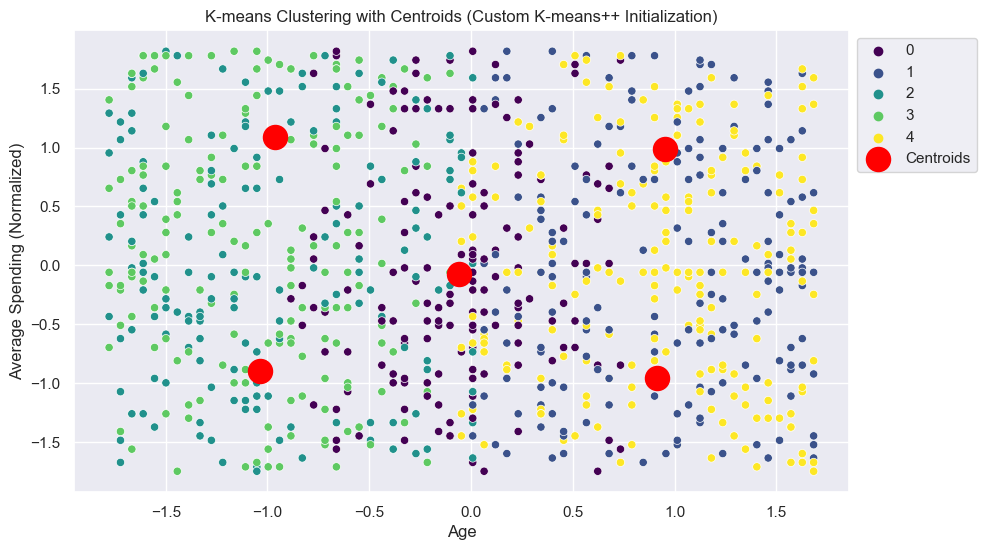

In [151]:
data = sales_data[['Age_n', 'Purchase_Frequency_Per_Month_n']]

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()


optimal_k = 5

kmeans_initial = KMeans(n_clusters=1, init='k-means++', random_state=42)
kmeans_initial.fit(data_scaled)
initial_centroid = kmeans_initial.cluster_centers_

kmeans = KMeans(n_clusters=optimal_k - 1, init='k-means++', random_state=42)
kmeans.fit(data_scaled)
remaining_centroids = kmeans.cluster_centers_

initial_centroids = np.concatenate((initial_centroid, remaining_centroids), axis=0)


kmeans_final = KMeans(n_clusters=optimal_k, init=initial_centroids, n_init=1, random_state=42)
sales_data['Cluster'] = kmeans_final.fit_predict(data_scaled)


plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age_n', y='Average_Spending_Per_Purchase_n', hue='Cluster', data=sales_data, palette='viridis', legend='full')

centroids = kmeans_final.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', marker='o', label='Centroids')

plt.title('K-means Clustering with Centroids (Custom K-means++ Initialization)')
plt.xlabel('Age')
plt.ylabel('Average Spending (Normalized)')

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


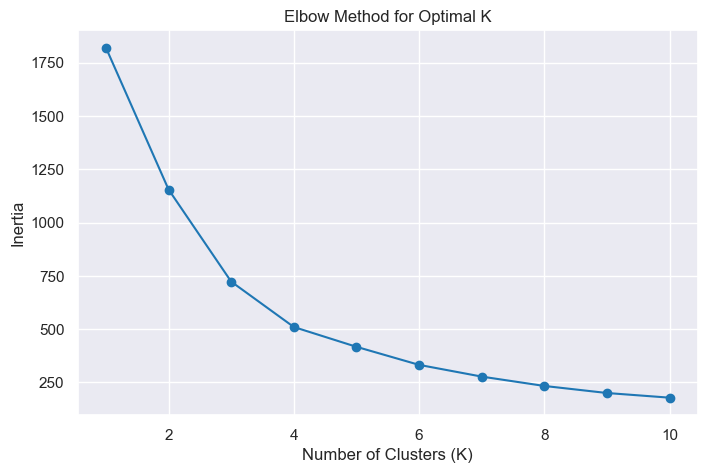

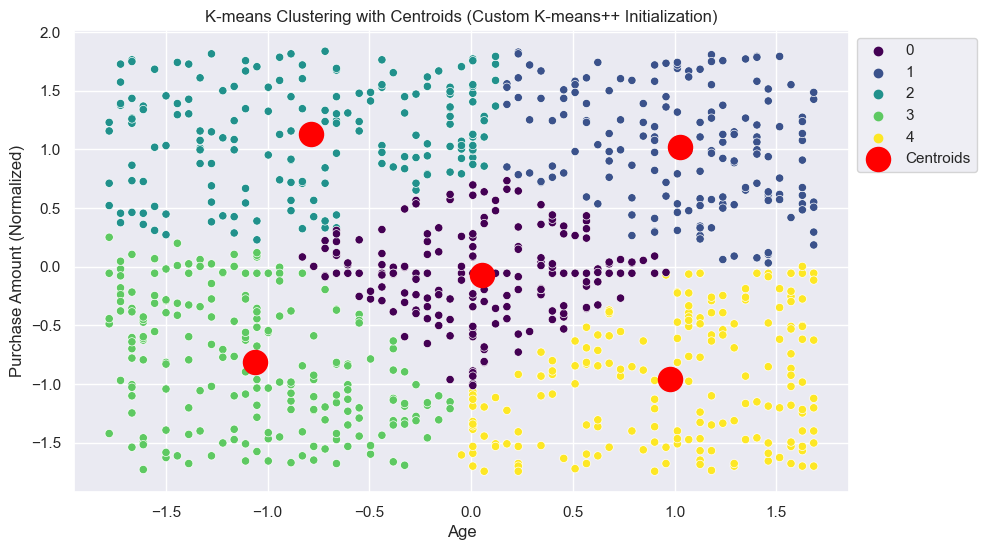

In [152]:
data = sales_data[['Age_n', 'Purchase_Amount_n']]

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()



optimal_k = 5 

kmeans_initial = KMeans(n_clusters=1, init='k-means++', random_state=42)
kmeans_initial.fit(data_scaled)
initial_centroid = kmeans_initial.cluster_centers_

kmeans = KMeans(n_clusters=optimal_k - 1, init='k-means++', random_state=42)
kmeans.fit(data_scaled)
remaining_centroids = kmeans.cluster_centers_

initial_centroids = np.concatenate((initial_centroid, remaining_centroids), axis=0)

kmeans_final = KMeans(n_clusters=optimal_k, init=initial_centroids, n_init=1, random_state=42)
sales_data['Cluster'] = kmeans_final.fit_predict(data_scaled)


plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age_n', y='Purchase_Amount_n', hue='Cluster', data=sales_data, palette='viridis', legend='full')

centroids = kmeans_final.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', marker='o', label='Centroids')

plt.title('K-means Clustering with Centroids (Custom K-means++ Initialization)')
plt.xlabel('Age')
plt.ylabel('Purchase Amount (Normalized)')

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


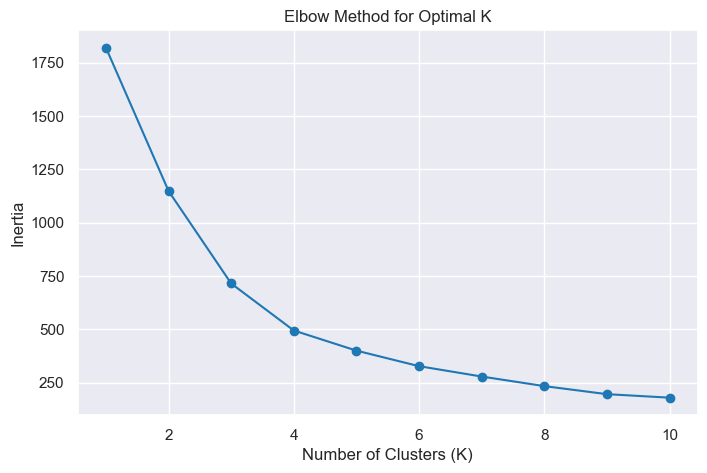

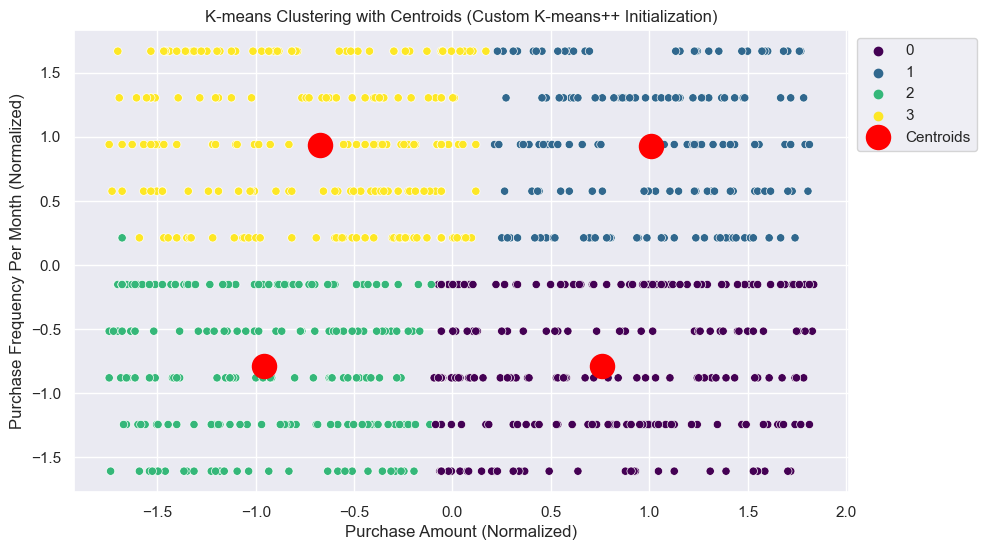

In [153]:

data = sales_data[['Purchase_Amount_n', 'Purchase_Frequency_Per_Month_n']]

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()

optimal_k = 4


kmeans_initial = KMeans(n_clusters=1, init='k-means++', random_state=42)
kmeans_initial.fit(data_scaled)
initial_centroid = kmeans_initial.cluster_centers_

kmeans = KMeans(n_clusters=optimal_k - 1, init='k-means++', random_state=42)
kmeans.fit(data_scaled)
remaining_centroids = kmeans.cluster_centers_

initial_centroids = np.concatenate((initial_centroid, remaining_centroids), axis=0)


kmeans_final = KMeans(n_clusters=optimal_k, init=initial_centroids, n_init=1, random_state=42)
sales_data['Cluster'] = kmeans_final.fit_predict(data_scaled)


plt.figure(figsize=(10, 6))
sns.scatterplot(x='Purchase_Amount_n', y='Purchase_Frequency_Per_Month_n', hue='Cluster', data=sales_data, palette='viridis', legend='full')

centroids = kmeans_final.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', marker='o', label='Centroids')

plt.title('K-means Clustering with Centroids (Custom K-means++ Initialization)')
plt.xlabel('Purchase Amount (Normalized)')
plt.ylabel('Purchase Frequency Per Month (Normalized)')

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


## Module 4

## Compare the results of all three clustering algorithms

## K-Means

Uses the concept of centroids to form clusters
Requires the number of clusters K to be specified in advance.


## K-Means++

A variation of the K-Means algorithm that improves the selection of initial centroids.
Selects initial centroids in a way that minimizes the variance between clusters.




## DBSCAN
DBScan is useful for datasets with arbitrary shapes, varying densities, and when the number of clusters is not known beforehand. K-Means++ can be used as an improvement over K-Means to achieve more stable clustering results.

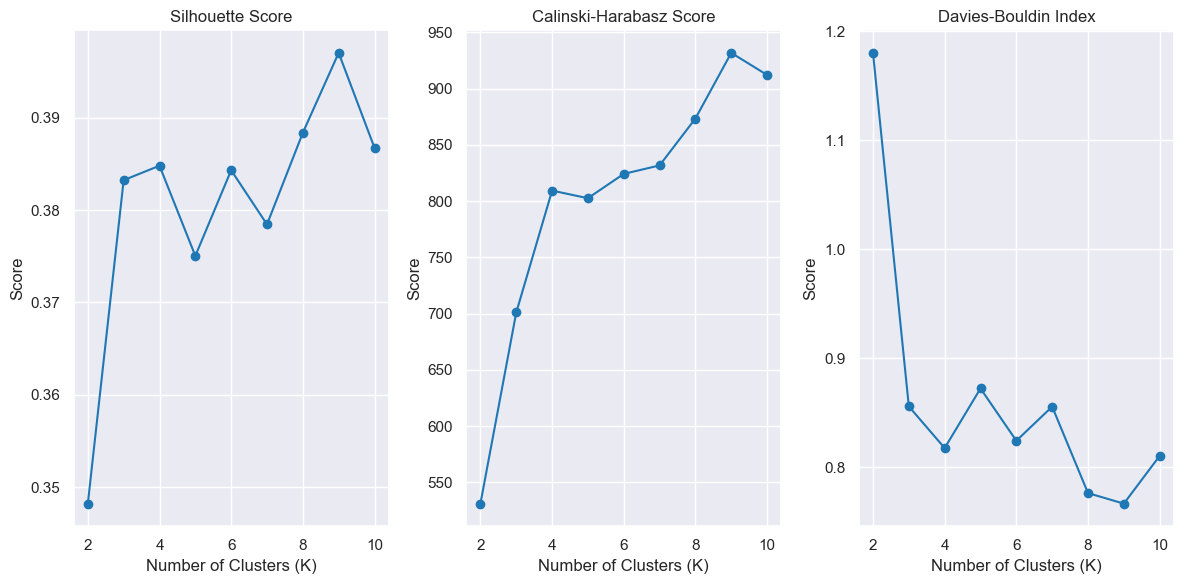

In [158]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import matplotlib.pyplot as plt


data = sales_data[['Purchase_Amount_n', 'Purchase_Frequency_Per_Month_n']]
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)


silhouette_scores = []
calinski_harabasz_scores = []
davies_bouldin_scores = []


k_values = range(2, 11)


for k in k_values:
    # K-Means
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans_labels = kmeans.fit_predict(data_scaled)
    silhouette_scores.append(silhouette_score(data_scaled, kmeans_labels))
    calinski_harabasz_scores.append(calinski_harabasz_score(data_scaled, kmeans_labels))
    davies_bouldin_scores.append(davies_bouldin_score(data_scaled, kmeans_labels))

# Plotting the results
plt.figure(figsize=(12, 6))

# Silhouette Score
plt.subplot(1, 3, 1)
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Score')

# Calinski-Harabasz Score
plt.subplot(1, 3, 2)
plt.plot(k_values, calinski_harabasz_scores, marker='o')
plt.title('Calinski-Harabasz Score')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Score')

# Davies-Bouldin Index
plt.subplot(1, 3, 3)
plt.plot(k_values, davies_bouldin_scores, marker='o')
plt.title('Davies-Bouldin Index')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Score')

plt.tight_layout()
plt.show()


## K-Means

Advantages

K-Means might be a good choice if the number of customer segments is known or can be estimated reliably

Simple and easy to implement.

Computationally efficient for large datasets.

Disadvantages

Requires the number of clusters K to be specified in advance, which may not always be known.

Sensitive to initial centroid selection and can converge to a local minimum.

## DBSCAN:

Advantages:

DBSCAN could be useful if the data has varying cluster densities or if there are outliers that need to be identified as noise points

Does not require the number of clusters to be specified in advance, making it suitable for datasets with varying cluster densities

Can identify noise points as outliers and does not assume spherical clusters.

Robust to outliers and able to handle irregularly shaped clusters.

Disadvantages

Sensitivity to the distance metric used and the choice of epsilon (eps) and min_samples parameters.

Can be computationally expensive for large datasets, especially when density is not well-defined.



## K-Means++

Advantages

K-Means++ could improve the performance of K-Means by providing better initial centroids, potentially leading to more stable and accurate clusters.

Improves K-Means' convergence and reduces the likelihood of converging to a local minimum by initializing centroids in a more 
strategic manner.
Can result in more stable and accurate cluster assignments compared to traditional K-Means.

Disadvantages

Adds some computational overhead during initialization due to the extra steps involved in selecting initial centroids.






# Draw conclusions and recommendations

## Better Centroids 
K-means++ selects initial cluster centroids that are spread out and well-distributed across the data, which helps in finding better cluster centers.provide a  better overall clustering solution compared to the random initialization used in standard K-means.

## Improved Convergence
By starting with better initial centroids, K-means++ often converges faster than the standard K-means algorithm. This is because the initial centroids are already closer to their final positions, reducing the number of iterations needed to reach convergence.

## Reduced Sensitivity to Initialization
Standard K-means can be sensitive to the initial placement of centroids but  K-means++ reduces this sensitivity by providing a more systematic initialization strategy, resulting in more consistent and reliable clustering results.

Customer Analysis 

## Part A

K-Means and DBSCAN are two methods for sorting customers into groups and making clusters based on their shopping from the  store

K-Means is equal-sized clusters but may not work well for all types of data

DBSCAN is better at finding arbitrary-shaped clusters 

## Part B

The study found three main groups of shoppers at Imtiaz Mall

High-Spending Customers They love expensive brands and buy new things often

Moderate-Spending Customers  They spend a steady amount of money and care about quality

Budget-Conscious Customers They look for good deals and do not care as much about brands

## Part C

Imtiaz Mall can use this information to

Create ads and publish on social media

Send Promotional Emails to its customers

Custom  product Recommendation

## Part D

Retain Customers

Increae Sale

Create social media Campigns

Understand Customer Requirements 

Track how each groups shopping habits change over time

Predict Future Sales of Store